<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/3%20-%20Naive%20Bayes/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gli algoritmi Naive Bayes

In [1]:
from sklearn.datasets import load_iris, make_gaussian_quantiles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
BASE_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/datasets/"
RANDOM_SEED = 0

## Gaussian Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB

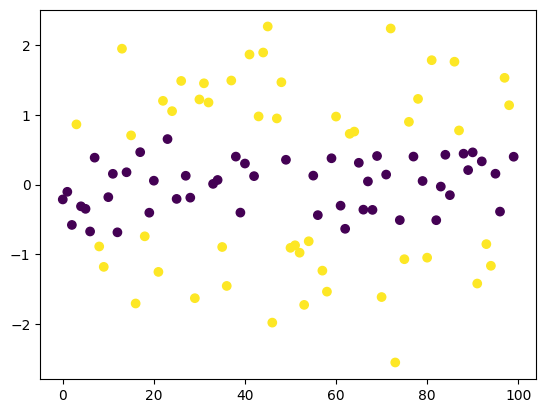

In [5]:
# Generiamo i dati con sklearn
X, y = make_gaussian_quantiles(n_features=1, n_classes=2, random_state=RANDOM_SEED)
plt.scatter(np.arange(X.shape[0]),X, c=y)

Notiamo che la distribuzione della classe positiva si distribuiscono intorno alla media 0, seguendo una distribuzione gaussiana

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)  #accuracy

0.36666666666666664

In [8]:
y_proba = lr.predict_proba(X_test)
log_loss(y_test, y_proba)

0.7342855504709547

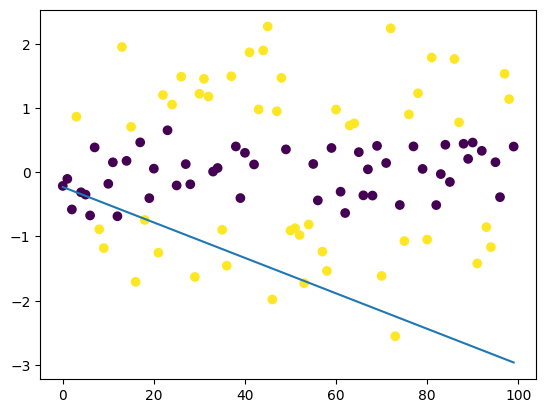

In [9]:
# Visualizziamo
a = np.arange(X.shape[0])
plt.scatter(a, X, c=y)
plt.plot(a, a*lr.coef_[0]+lr.intercept_)

L'accuracy è molto bassa perchè un modello di regressione lineare con questi dati non puù performare bene.
In questo caso tutto quello che sta sotto la retta viene classificato come appartendente alla classe negativa, tutto quello che sto sopra come positiva.. Non esiste una retta che classifica bene questo dataset.

Dobbiamo utilizzare quindi un modello Nave Bayes Gaussiano

In [10]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9333333333333333

Molto meglio !

In [11]:
y_proba = gnb.predict_proba(X_test)
log_loss(y_test, y_proba)

0.18879658207548125

## Bernoulli Naive Bayes

Capire se un sms è spam o no

Utilizziamo il Bag of words perchè con Bernoulli si usano variabili bianarie

In [12]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [15]:
df = pd.read_csv(BASE_URL+"spam.csv")
df.head()

,Unnamed: 0,MESSAGE,SPAM
0,2348,That seems unnecessarily affectionate,False
1,762,Urgent Ur å£500 guaranteed award is still uncl...,True
2,3298,Honeybee Said: *I'm d Sweetest in d World* God...,False
3,3104,Or remind me in a few hrs.,False
4,4241,Show ur colours! Euro 2004 2-4-1 Offer! Get an...,True


In [19]:
sms_list = df["MESSAGE"].tolist()
sms_list[:5]

['That seems unnecessarily affectionate',
 'Urgent Ur å£500 guaranteed award is still unclaimed! Call 09066368327 NOW closingdate04/09/02 claimcode M39M51 å£1.50pmmorefrommobile2Bremoved-MobyPOBox734LS27YF',
 "Honeybee Said: *I'm d Sweetest in d World* God Laughed &amp; Said: *Wait,U Havnt Met d Person Reading This Msg* MORAL: Even GOD Can Crack Jokes! GM+GN+GE+GN:)",
 'Or remind me in a few hrs.',
 'Show ur colours! Euro 2004 2-4-1 Offer! Get an England Flag & 3Lions tone on ur phone! Click on the following service message for info!']

In [17]:
"""
def build_vocab(corpus):
  vocab = []
  for text in corpus:
    for word in text.split():
      if word not in vocab:
        vocab.append(word.lower())
  return vocab
"""
#Costruiamo il vocabolario per il Bag od Words
def build_vocab(corpus):
  vocab = set({})
  for text in corpus:
    vocab = vocab.union(set(text.lower().split()))
  return list(vocab)


vocab = build_vocab(sms_list)
vocab[:10]

['breaker',
 'police',
 'thanks.',
 'b4',
 '08448350055',
 '\\be',
 'story',
 '83222',
 'kl341.',
 'luv']

In [18]:
#Bag of Words
def binary_bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = int(vocab[i] in sms) # 1 se la parola è presente
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bbow = binary_bow(sms_list, vocab=vocab)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [20]:
def binary_bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = int(vocab[i] in sms)
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bbow = binary_bow(sms_list, vocab=vocab)

In [21]:
# Creiamo i due array per addestramento e test
X = sms_bbow
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [22]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.92      0.95       155
        True       0.92      0.99      0.95       145

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



In [23]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

       False       0.95      0.95      0.95       146
        True       0.95      0.95      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## Multinomial Naive Bayes

In questo caso non usiamo il Bag od words


In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
df = pd.read_csv(BASE_URL+"spam.csv")
df.head()

,Unnamed: 0,MESSAGE,SPAM
0,2348,That seems unnecessarily affectionate,False
1,762,Urgent Ur å£500 guaranteed award is still uncl...,True
2,3298,Honeybee Said: *I'm d Sweetest in d World* God...,False
3,3104,Or remind me in a few hrs.,False
4,4241,Show ur colours! Euro 2004 2-4-1 Offer! Get an...,True


In [26]:
def bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = sms.split().count(vocab[i])
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bow = bow(sms_list, vocab)

In [27]:
np.array(sms_bow).max()

7

In [28]:
X = sms_bow
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [29]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

       False       0.92      0.89      0.90       149
        True       0.90      0.92      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [30]:
benb = BernoulliNB()    #Possiamo utilizzare Bernoulli anche per dati non binari perchè la classe li binarizza in automatico
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.85      0.92       170
        True       0.84      1.00      0.91       130

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



In [31]:
mnb.class_count_

array([355., 345.])

### Con TF-IDF

**ATTENZIONE** Il vocabolario va costruito sui dati di training, altrimenti è data leakage!

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df["MESSAGE"]
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(700, 1000)

In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       174
           1       0.81      1.00      0.89       126

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.92      0.90      0.90       300



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       142
           1       0.94      0.92      0.93       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



##Complement Naive Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
df = pd.read_csv(BASE_URL+"spam.csv")
df.head()

,SPAM,MESSAGE
0,0,Good afternoon my boytoy. How goes that walkin...
1,0,Painful words- \I thought being Happy was the ...
2,0,Do you know why god created gap between your f...
3,1,Todays Voda numbers ending 7548 are selected t...
4,0,Hope this text meets you smiling. If not then ...


In [ ]:
df["SPAM"].value_counts()

0    866
1    134
Name: SPAM, dtype: int64

In [ ]:
X = df["MESSAGE"]
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(700, 1000)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       273
           1       0.69      1.00      0.82        27

    accuracy                           0.96       300
   macro avg       0.85      0.98      0.90       300
weighted avg       0.97      0.96      0.96       300



In [ ]:
confusion_matrix(y_test, mnb.predict(X_test))

array([[261,   0],
       [ 12,  27]])

In [ ]:
comnb = ComplementNB()
comnb.fit(X_train, y_train)
report = classification_report(comnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       246
           1       0.92      0.67      0.77        54

    accuracy                           0.93       300
   macro avg       0.93      0.83      0.87       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
confusion_matrix(y_test, comnb.predict(X_test))

array([[243,  18],
       [  3,  36]])

## Categorical Naive Bayes

In [40]:
from sklearn.naive_bayes import CategoricalNB

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/boston.csv",
                 usecols=["ZN", "CHAS", "RAD", "RM", "PRICE",])
df.head()

,ZN,CHAS,RM,RAD,PRICE
0,18.0,0.0,6.575,1.0,24.0
1,0.0,0.0,6.421,2.0,21.6
2,0.0,0.0,7.185,2.0,34.7
3,0.0,0.0,6.998,3.0,33.4
4,0.0,0.0,7.147,3.0,36.2


In [42]:
df["RM"] = df["RM"].apply(lambda x: int(x))
df.nunique()

ZN        26
CHAS       2
RM         6
RAD        9
PRICE    229
dtype: int64

In [43]:
# Convertiamo il valore del prezzo in una categoria, in modo da fare classificazione non regressione. Perchè utilizzare Naive Byes non va bene facendo regressione

def price_to_category(price):

  categories = ["VERY CHEAP", "CHEAP", "AVERAGE", "EXPENSIVE", "VERY EXPESIVE"]

  for i in range(1,5):
    if price<df["PRICE"].quantile(0.2*i): #perchè ho 5 categorie e quindi vado di un passo di 0.2
      return categories[i]
  
  return categories[-1]


df["PRICE"] = df["PRICE"].apply(price_to_category)
df.head()

,ZN,CHAS,RM,RAD,PRICE
0,18.0,0.0,6,1.0,VERY EXPESIVE
1,0.0,0.0,6,2.0,EXPENSIVE
2,0.0,0.0,7,2.0,VERY EXPESIVE
3,0.0,0.0,6,3.0,VERY EXPESIVE
4,0.0,0.0,7,3.0,VERY EXPESIVE


In [44]:
X = df.drop("PRICE", axis=1).values
y = df["PRICE"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [45]:
lr = GaussianNB()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3881578947368421

In [46]:
catnb = CategoricalNB()
catnb.fit(X_train, y_train)
catnb.score(X_test, y_test)

0.5657894736842105